<a href="https://colab.research.google.com/github/ReidelVichot/LC_identification/blob/main/Infrastructure_112324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# -- Setting environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

Mounted at /content/drive


In [20]:
dpath = '/content/drive/MyDrive/Disertation/'

# -- import county shapes
fname = 'countyshp/tl_2010_us_county00/tl_2010_us_county00.shp'
counties = gpd.read_file(dpath+fname)
counties["GEOID"] = counties['STATEFP00'].str.zfill(2) + counties['COUNTYFP00'].str.zfill(3)
cols = ['GEOID', 'geometry']
counties = counties[cols]

# -- set crs
crs = 'EPSG:4269'
counties = counties.to_crs(crs)

dpath = '/content/drive/MyDrive/Disertation/Infrastructure/'
# -- import highways
fname = 'BTS/Highways_DOT/Highways_DOT.shp'
highways = gpd.read_file(dpath+fname)
highways = highways.to_crs(crs)

# -- import Airports
fname = 'BTS/Airports_DOT/Airports_DOT.shp'
airports = gpd.read_file(dpath+fname)
airports = airports.to_crs(crs)

# -- import Ports
fname = 'BTS/Ports_DOT/Ports_DOT.shp'
ports = gpd.read_file(dpath+fname)
ports = ports.to_crs(crs)

# -- import rails
fname = 'BTS/Rail_DOT/Rail_DOT.shp'
rails = gpd.read_file(dpath+fname)
rails = rails.to_crs(crs)

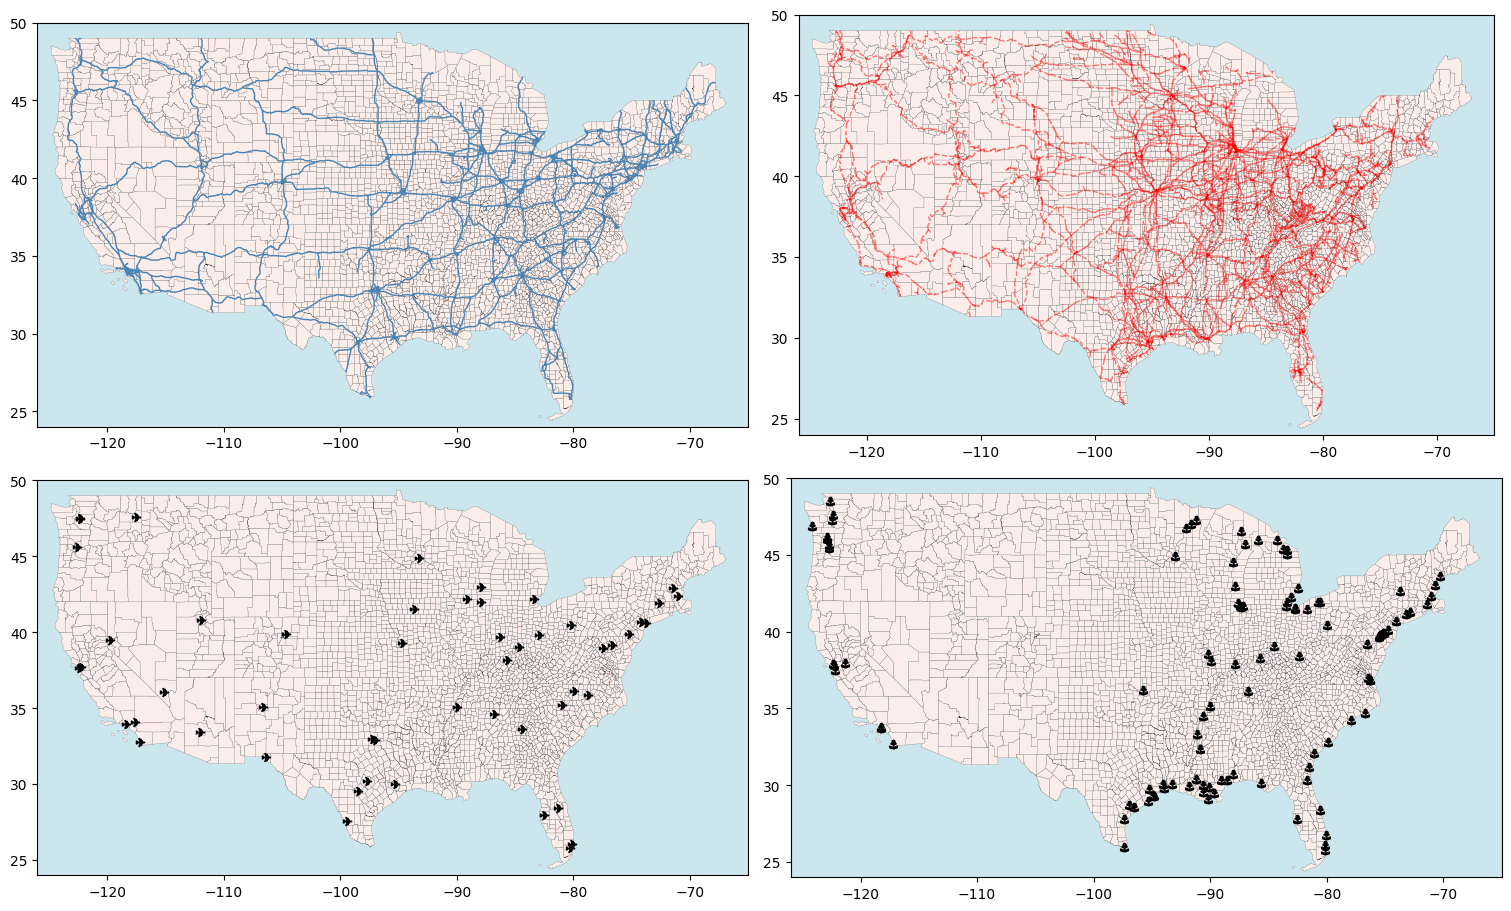

In [81]:
from matplotlib.markers import MarkerStyle
fig, ax = plt.subplots(2, 2, figsize=(15, 9), constrained_layout=True)

x_lim = [-126, -65]
y_lim = [24, 50]

counties.plot(linewidth=0.1, edgecolor= "k", facecolor='#FBEEEA', ax=ax[0,0])
highways.plot(linewidth=1, color = 'steelblue',   ax=ax[0,0])
ax[0,0].set_facecolor('#CCE6EE')


counties.plot(linewidth=0.1, edgecolor= "k", facecolor='#FBEEEA', ax=ax[0,1])
rails.plot(linewidth=1, color = 'red', alpha=0.5, linestyle="--", ax=ax[0,1])
ax[0,1].set_facecolor('#CCE6EE')


counties.plot(linewidth=0.1, edgecolor= "k", facecolor='#FBEEEA', ax=ax[1,0])
plane = MarkerStyle("$\u2708$")  # Unicode airplane character
airports.plot(marker=plane, c='k', ax=ax[1,0], label="Airports")
ax[1,0].set_facecolor('#CCE6EE')


counties.plot(linewidth=0.1, edgecolor= "k", facecolor='#FBEEEA', ax=ax[1,1])
anchor = MarkerStyle('$\u2693$') # Unicode anchor character
ports.plot(marker=anchor, c='k', ax=ax[1,1], label="Ports")
ax[1,1].set_facecolor('#CCE6EE')


ax[0, 0].set_xlim(x_lim)
ax[0, 0].set_ylim(y_lim)
ax[0, 1].set_xlim(x_lim)
ax[0, 1].set_ylim(y_lim)
ax[1, 0].set_xlim(x_lim)
ax[1, 0].set_ylim(y_lim)
ax[1, 1].set_xlim(x_lim)
ax[1, 1].set_ylim(y_lim)
fig.show()


In [82]:
print(counties.crs)
print(highways.crs)
print(rails.crs)
print(airports.crs)
print(ports.crs)

EPSG:4269
EPSG:4269
EPSG:4269
EPSG:4269
EPSG:4269


AttributeError: 'numpy.ndarray' object has no attribute 'values'